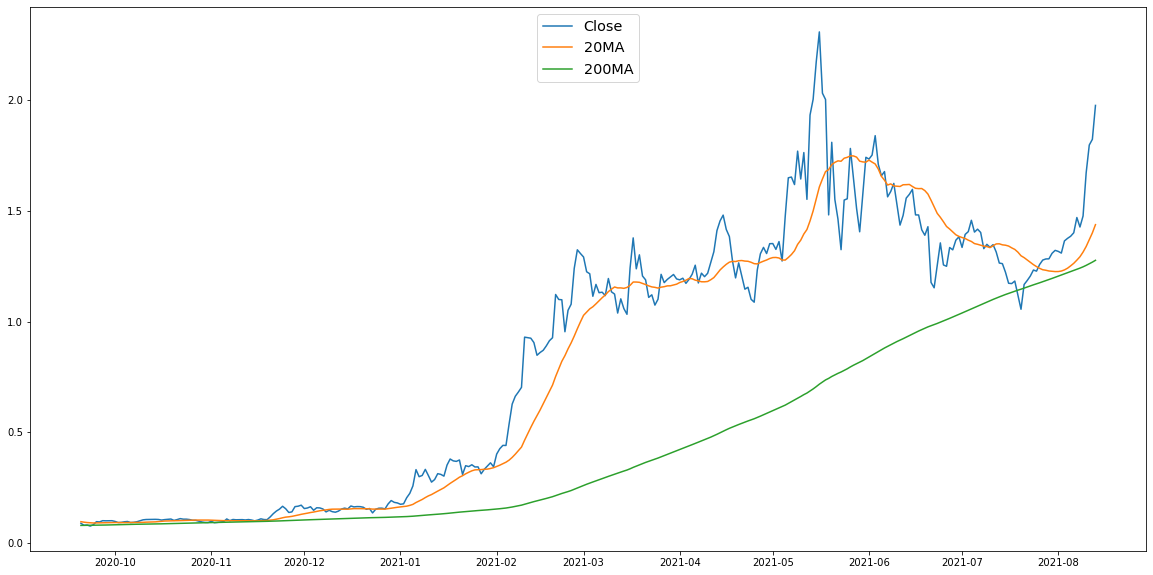

In [2]:
#import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

choose_Stock = yf.Ticker("ADA-USD")
stockdata = choose_Stock.history(start="2020-01-15")
#stockdata.drop(["Volume"],inplace=True,axis=1)

#Calculate mean
stockdata["20MA"]=stockdata[["Close"]].rolling(20).mean()
stockdata["50MA"]=stockdata[["Close"]].rolling(50).mean()
stockdata["100MA"]=stockdata[["Close"]].rolling(100).mean()
stockdata["150MA"]=stockdata[["Close"]].rolling(150).mean()
stockdata["200MA"]=stockdata[["Close"]].rolling(200).mean()
stockdata["250MA"]=stockdata[["Close"]].rolling(250).mean()

stockdata.dropna(inplace=True)
plt.figure(figsize=(20,10))

#Plot data
plt.plot(stockdata["Close"],label="Close")
plt.plot(stockdata["20MA"],label="20MA")
#plt.plot(stockdata["50MA"],label="50MA")
#plt.plot(stockdata["100MA"],label="100MA")
#plt.plot(stockdata["150MA"],label="150MA")
plt.plot(stockdata["200MA"],label="200MA")
#plt.plot(stockdata["250MA"],label="250MA")

plt.legend(loc='upper center',fontsize="x-large")

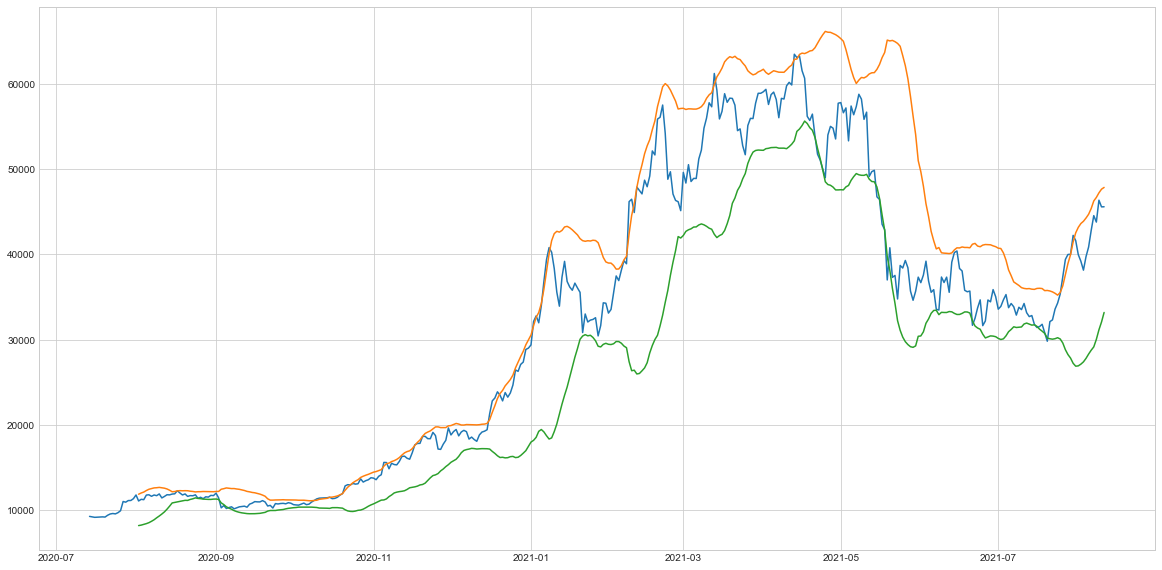

In [5]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt


#choose a ticker symbol
ticker4 = yfinance.Ticker('BTC-USD')
df2 = ticker4.history(interval="1d",start="2020-07-15",end="2021-08-12")


period = 20
multiplier = 2

df2['UpperBand'] = df2['Close'].rolling(period).mean() + df2['Close'].rolling(period).std() * multiplier
df2['LowerBand'] = df2['Close'].rolling(period).mean() - df2['Close'].rolling(period).std() * multiplier



plt.figure(figsize=(20,10))
plt.plot(df2['Close'])

plt.plot(df2['UpperBand'])
plt.plot(df2['LowerBand'])

[*********************100%***********************]  1 of 1 completed


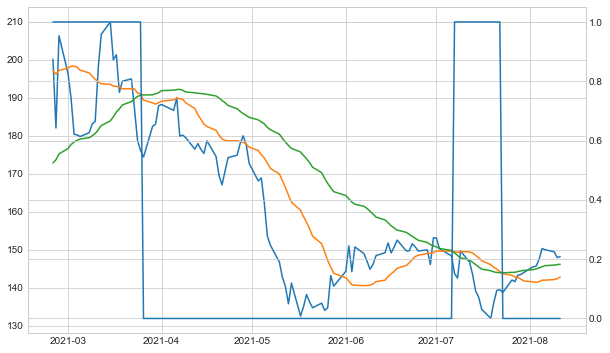

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import pandas as pd
import numpy as np


df = yf.download('ABNB', start = '2018-10-10', end = '2021-08-12')


def strategy(df, sma1, sma2):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df['position'] = np.where(df['SMA1'] > df['SMA2'], 1,0)
    df['stratret'] = df['position'].shift(1) + df['ret']
    df = df.dropna()
    return df
    
    
def performance(df):
    return np.exp(df[['ret', 'stratret']].sum())
 
''' 
performance(strategy(df,20,50))
'''

stratdf = strategy(df,20,50)


fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
ax.plot(stratdf[['Close', 'SMA1','SMA2']])
ax2.plot(stratdf['position'])